In [1]:
import pandas as pd

In [9]:
mat_nat = pd.read_csv('../data/wb_pisa_math_nat.csv')
sci_nat = pd.read_csv('../data/wb_pisa_science_nat.csv')
read_nat = pd.read_csv('../data/wb_pisa_reading_nat.csv')


In [11]:
read_nat

,Country,2006_Mean,2006_SE,2009_Mean,2009_SE,2012_Mean,2012_SE,2015_Mean,2015_SE,2018_Mean,2018_SE,2022_Mean,2022_SE,Country Code,ict_national,Population_2018,GDP_2018_USD
0,Austria,492.0,2.7,491.0,3.8,490.0,4.1,NaN,NaN,490,2.8,485,2.8,AUT,Yes,8.8,455.3
1,Chile,410.0,3.6,NaN,NaN,442.0,5.0,449.0,3.1,441,2.9,452,2.6,CHL,Yes,18.7,298.2
2,Colombia,NaN,NaN,NaN,NaN,385.0,5.1,413.0,3.7,403,3.4,409,3.8,COL,Yes,49.1,336.9
3,Czech Republic,492.0,2.4,489.0,3.5,483.0,4.2,478.0,2.9,493,2.9,487,2.6,CZE,Yes,10.6,245.2
4,Denmark,497.0,2.4,492.0,2.8,494.0,3.2,495.0,2.1,496,2.6,500,2.5,DNK,No,5.8,352.1
5,Estonia,NaN,NaN,NaN,NaN,501.0,2.9,501.0,2.6,516,2.0,519,2.2,EST,Yes,1.3,30.6
6,Finland,546.0,2.6,543.0,1.6,547.0,2.1,536.0,2.3,524,2.4,526,2.5,FIN,No,5.5,276.8
7,France,505.0,2.7,496.0,2.7,488.0,4.1,496.0,3.4,505,2.8,499,2.5,FRA,Yes,66.9,2789.1
8,Germany,484.0,2.5,491.0,3.4,495.0,4.4,497.0,2.7,508,2.8,509,3.0,DEU,No,82.9,3947.6
9,Hungary,480.0,4.0,482.0,2.5,482.0,3.3,494.0,3.2,488,3.2,470,2.7,HUN,Yes,9.8,155.7


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def prepare_clean_data(math_df, science_df, reading_df):
    def clean_treatment(x):
        if pd.isna(x):
            return np.nan
        return 1 if x == 'Yes' else 0
    
    base_data = pd.DataFrame({
        'country': math_df['Country'],
        'treatment': math_df['ict_national'].apply(clean_treatment),
        'gdp': np.log(math_df['GDP_2018_USD']),
        'population': np.log(math_df['Population_2018'])
    })
    
    # Eliminar países sin información clara de tratamiento
    base_data = base_data.dropna(subset=['treatment'])
    valid_countries = base_data['country'].tolist()
    
    # Filtrar los dataframes originales
    math_df = math_df[math_df['Country'].isin(valid_countries)]
    science_df = science_df[science_df['Country'].isin(valid_countries)]
    reading_df = reading_df[reading_df['Country'].isin(valid_countries)]
    
    # Crear dataframe largo
    years = ['2006', '2009', '2012', '2015', '2018', '2022']
    data_long = []
    
    for year in years:
        year_data = pd.DataFrame({
            'country': base_data['country'],
            'year': int(year),
            'math_score': math_df[f'{year}_Mean'],
            'science_score': science_df[f'{year}_Mean'],
            'reading_score': reading_df[f'{year}_Mean'],
            'treatment': base_data['treatment'],
            'gdp': base_data['gdp'],
            'population': base_data['population']
        })
        data_long.append(year_data)
    
    data_long = pd.concat(data_long, ignore_index=True)
    
    # Eliminar filas con valores faltantes
    data_long = data_long.dropna()
    
    # Normalizar scores
    for col in ['math_score', 'science_score', 'reading_score']:
        data_long[col] = (data_long[col] - data_long[col].mean()) / data_long[col].std()
    
    # Crear score combinado
    data_long['combined_score'] = data_long[['math_score', 'science_score', 'reading_score']].mean(axis=1)
    
    # Variables DiD
    data_long['post'] = (data_long['year'] >= 2020).astype(int)
    data_long['did'] = data_long['treatment'] * data_long['post']
    
    return data_long

def run_did_analysis(data):
    # Verificar que no hay valores faltantes
    if data.isnull().any().any():
        raise ValueError("Hay valores faltantes en los datos")
        
    # Preparar variables para el modelo
    X = pd.DataFrame({
        'treatment': data['treatment'],
        'post': data['post'],
        'did': data['did'],
        'gdp': data['gdp'],
        'population': data['population'],
        'constant': 1
    })
    
    outcomes = ['combined_score', 'math_score', 'science_score', 'reading_score']
    results = {}
    
    for outcome in outcomes:
        model = sm.OLS(data[outcome], X)
        results[outcome] = model.fit(cov_type='cluster', 
                                   cov_kwds={'groups': data['country']})
    
    return results

# Ejecutar análisis
clean_data = prepare_clean_data(mat_nat, sci_nat, read_nat)
did_results = run_did_analysis(clean_data)

# Mostrar resultados
def display_results(results):
    for outcome, result in results.items():
        print(f"\nResultados para {outcome}:")
        print(result.summary().tables[1])
        
display_results(did_results)


Resultados para combined_score:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment      0.1805      0.289      0.624      0.532      -0.386       0.747
post          -0.1430      0.088     -1.630      0.103      -0.315       0.029
did            0.1395      0.114      1.225      0.221      -0.084       0.363
gdp            1.0286      0.374      2.751      0.006       0.296       1.761
population    -1.1899      0.433     -2.746      0.006      -2.039      -0.340
constant      -3.3089      1.353     -2.446      0.014      -5.960      -0.658

Resultados para math_score:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment      0.4117      0.351      1.173      0.241      -0.276       1.099
post          -0.1923      0.145     -1.325      0.185      -0.477   


=== Resultados para grupo medio ===

Outcome: combined_score
Coeficiente DiD: 0.023409628989028874
Error estándar: 0.14383837565979704
P-valor: 0.8707156423161719

Outcome: math_score
Coeficiente DiD: 0.2856978165642037
Error estándar: 0.2261837440532934
P-valor: 0.20654509506339513

Outcome: science_score
Coeficiente DiD: -0.10479261661850303
Error estándar: 0.2507363711874494
P-valor: 0.6759914011564453

Outcome: reading_score
Coeficiente DiD: -0.11067631297861408
Error estándar: 0.3098498088711474
P-valor: 0.7209470113597811

=== Resultados para grupo bajo ===

Outcome: combined_score
Coeficiente DiD: 0.0919241687624118
Error estándar: 0.15562804451831927
P-valor: 0.5547443442892703

Outcome: math_score
Coeficiente DiD: 0.11189733131085056
Error estándar: 0.2345771777593349
P-valor: 0.6333499260361848

Outcome: science_score
Coeficiente DiD: 0.30976643830531164
Error estándar: 0.20155767807363364
P-valor: 0.124326982741345

Outcome: reading_score
Coeficiente DiD: -0.145891263328926

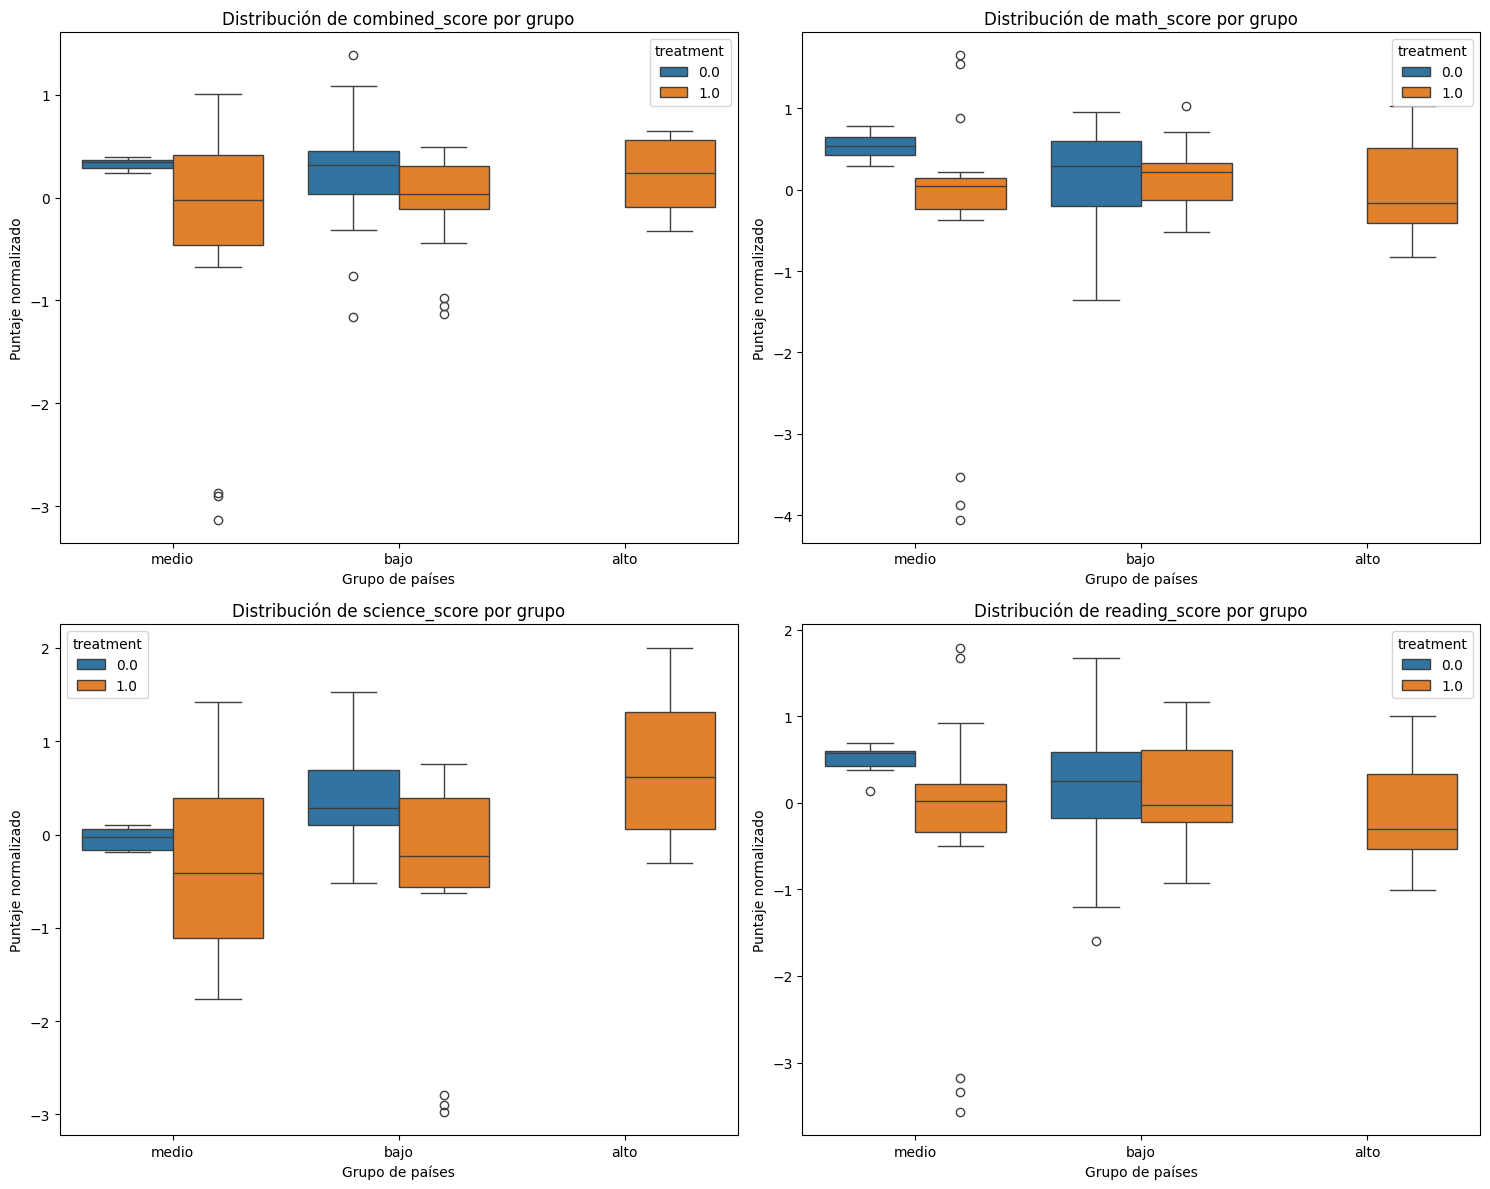

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

def create_country_groups(data):
    # Crear DataFrame con características para clustering
    country_features = data.groupby('country').agg({
        'gdp': 'first',
        'population': 'first'
    }).reset_index()
    
    # Normalizar características
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(
        country_features[['gdp', 'population']]
    )
    
    # Aplicar K-means clustering (3 grupos)
    kmeans = KMeans(n_clusters=3, random_state=42)
    country_features['group'] = kmeans.fit_predict(features_scaled)
    
    # Etiquetar grupos según PIB promedio
    group_gdp = country_features.groupby('group')['gdp'].mean()
    group_mapping = {
        group: label for group, label in 
        zip(group_gdp.index, ['bajo', 'medio', 'alto'])
    }
    country_features['group_label'] = country_features['group'].map(group_mapping)
    
    return country_features[['country', 'group_label']]

def run_did_by_group(data, country_groups):
    # Combinar datos con grupos
    data_with_groups = data.merge(country_groups, on='country')
    results = {}
    
    # Análisis por grupo
    for group in data_with_groups['group_label'].unique():
        group_data = data_with_groups[data_with_groups['group_label'] == group]
        
        # Verificar si hay suficientes observaciones
        if len(group_data) < 10:
            print(f"Grupo {group} tiene muy pocas observaciones")
            continue
            
        # Preparar variables para el modelo
        X = pd.DataFrame({
            'treatment': group_data['treatment'],
            'post': group_data['post'],
            'did': group_data['did'],
            'gdp': group_data['gdp'],
            'population': group_data['population'],
            'constant': 1
        })
        
        # Correr modelo para cada outcome
        group_results = {}
        for outcome in ['combined_score', 'math_score', 'science_score', 'reading_score']:
            model = sm.OLS(group_data[outcome], X)
            group_results[outcome] = model.fit(
                cov_type='cluster', 
                cov_kwds={'groups': group_data['country']}
            )
            
        results[group] = group_results
    
    return results

def plot_treatment_effects(data, country_groups):
    # Combinar datos con grupos
    data_with_groups = data.merge(country_groups, on='country')
    
    # Crear gráfico para cada materia
    subjects = ['combined_score', 'math_score', 'science_score', 'reading_score']
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, subject in enumerate(subjects):
        sns.boxplot(
            data=data_with_groups,
            x='group_label',
            y=subject,
            hue='treatment',
            ax=axes[idx]
        )
        axes[idx].set_title(f'Distribución de {subject} por grupo')
        axes[idx].set_xlabel('Grupo de países')
        axes[idx].set_ylabel('Puntaje normalizado')
    
    plt.tight_layout()
    plt.show()

# Ejecutar análisis
country_groups = create_country_groups(clean_data)
group_results = run_did_by_group(clean_data, country_groups)

# Mostrar resultados por grupo
def display_group_results(results):
    for group, group_results in results.items():
        print(f"\n=== Resultados para grupo {group} ===")
        for outcome, model in group_results.items():
            print(f"\nOutcome: {outcome}")
            print("Coeficiente DiD:", model.params['did'])
            print("Error estándar:", model.bse['did'])
            print("P-valor:", model.pvalues['did'])

display_group_results(group_results)
plot_treatment_effects(clean_data, country_groups)

In [27]:
clean_data.year.unique()

array([2015, 2018, 2022])

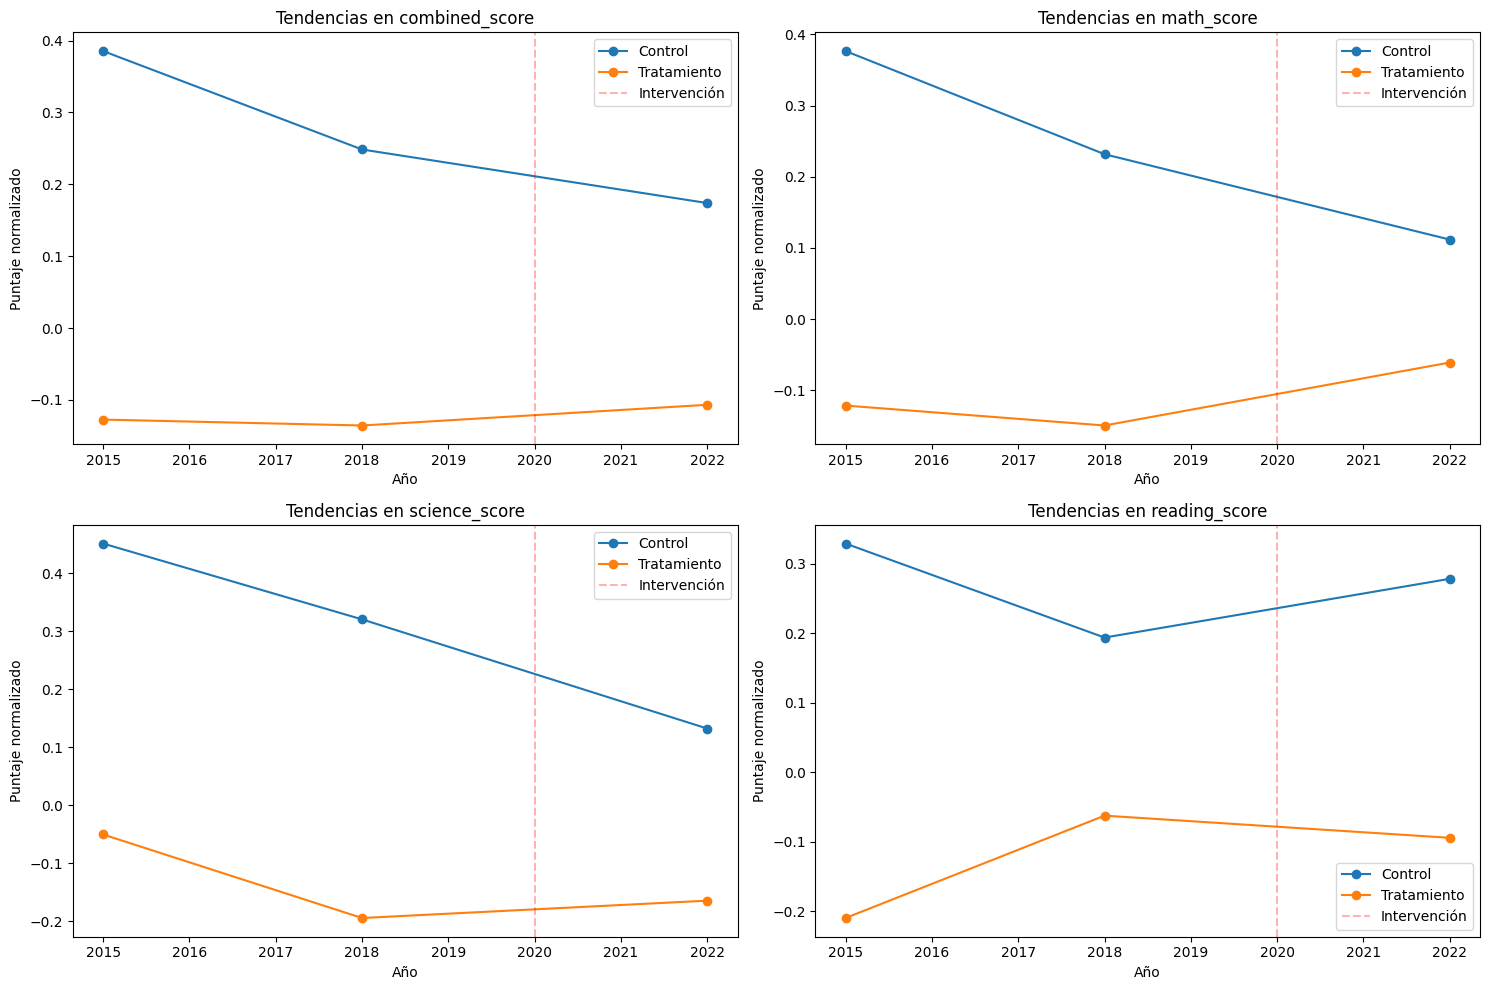

In [24]:
trends = clean_data.groupby(['year', 'treatment'])[
    ['combined_score', 'math_score', 'science_score', 'reading_score']
].mean().reset_index()

# Crear subplots para cada materia
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
outcomes = ['combined_score', 'math_score', 'science_score', 'reading_score']

for ax, outcome in zip(axes.flat, outcomes):
    for treatment in [0, 1]:
        group_data = trends[trends['treatment'] == treatment]
        ax.plot(group_data['year'], group_data[outcome], 
                marker='o', 
                label=f'{"Tratamiento" if treatment==1 else "Control"}')
        
    ax.axvline(x=2020, color='r', linestyle='--', alpha=0.3, 
                label='Intervención')
    ax.set_title(f'Tendencias en {outcome}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Puntaje normalizado')
    ax.legend()

plt.tight_layout()
plt.show()

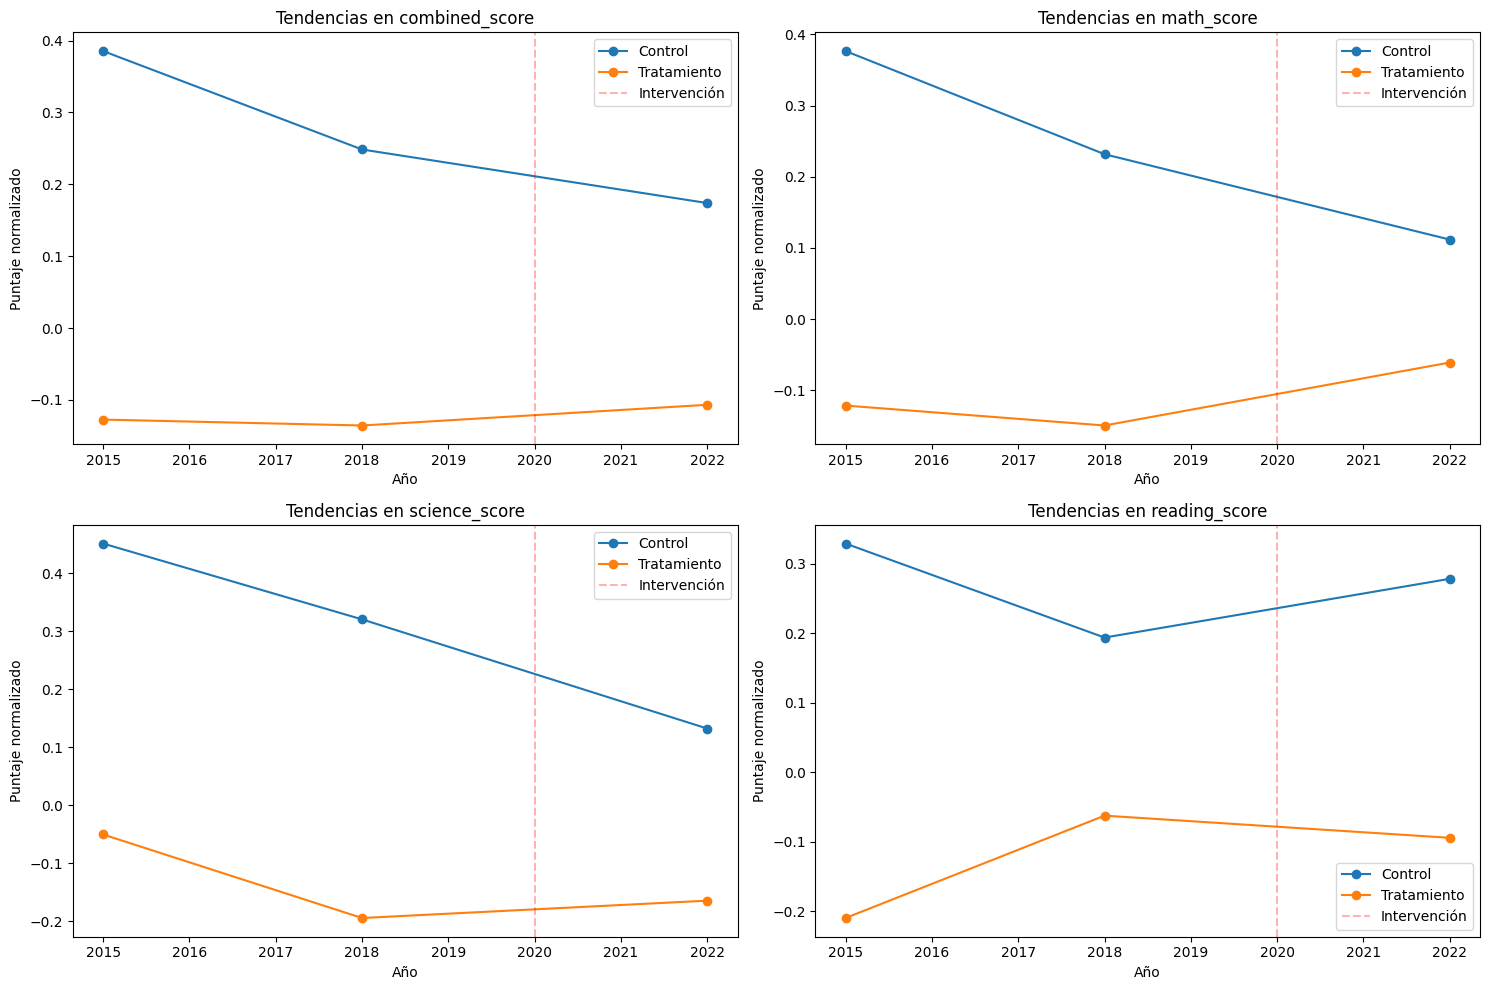

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_parallel_trends(data):
    # Calcular promedios por año y grupo de tratamiento
    trends = data.groupby(['year', 'treatment'])[
        ['combined_score', 'math_score', 'science_score', 'reading_score']
    ].mean().reset_index()
    
    # Crear subplots para cada materia
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    outcomes = ['combined_score', 'math_score', 'science_score', 'reading_score']
    
    for ax, outcome in zip(axes.flat, outcomes):
        for treatment in [0, 1]:
            group_data = trends[trends['treatment'] == treatment]
            ax.plot(group_data['year'], group_data[outcome], 
                   marker='o', 
                   label=f'{"Tratamiento" if treatment==1 else "Control"}')
            
        ax.axvline(x=2020, color='r', linestyle='--', alpha=0.3, 
                   label='Intervención')
        ax.set_title(f'Tendencias en {outcome}')
        ax.set_xlabel('Año')
        ax.set_ylabel('Puntaje normalizado')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

plot_parallel_trends(clean_data)